In [2]:
# Step 1: Climate Intelligence Platform - Basic Setup
# Let's start simple and build up gradually

import os
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Climate Intelligence Platform - Step 1")
print("=" * 50)
print("Setting up our foundation...")

class ClimateIntelligence:
    """
    Our main platform class - starting simple
    We'll add features step by step
    """
    
    def __init__(self):
        self.project_name = "Climate Risk Intelligence Platform"
        self.version = "1.0"
        self.data = {}  # We'll store our data here
        
        print(f"{self.project_name} v{self.version} initialized")
    
    def create_project_structure(self):
        """
        Create a clean folder structure for our project
        This helps organize everything properly
        """
        folders = [
            'data',           # Raw data files
            'processed',      # Cleaned data
            'models',         # Our ML models
            'outputs',        # Charts and reports
            'notebooks'       # Jupyter notebooks for analysis
        ]
        
        for folder in folders:
            os.makedirs(folder, exist_ok=True)
            print(f"Created folder: {folder}")
    
    def test_basic_functionality(self):
        """
        Let's test that our basic tools work
        """
        print("\nTesting basic functionality...")
        
        # Test pandas
        sample_data = pd.DataFrame({
            'company': ['Apple', 'Microsoft', 'Google'],
            'sector': ['Technology', 'Technology', 'Technology'],
            'risk_score': [25, 30, 20]
        })
        
        print("Sample data created:")
        print(sample_data)
        
        # Test numpy
        average_risk = np.mean(sample_data['risk_score'])
        print(f"\nAverage risk score: {average_risk}")
        
        # Test basic API connection (we'll use a simple public API)
        try:
            response = requests.get('https://httpbin.org/json', timeout=5)
            if response.status_code == 200:
                print("Internet connection working - we can fetch data from APIs")
            else:
                print("API connection issue")
        except:
            print("Internet connection problem")
        
        return sample_data

# Initialize our platform
climate_platform = ClimateIntelligence()

# Create our project structure
print("\nCreating project structure...")
climate_platform.create_project_structure()

# Test basic functionality
print("\nRunning basic tests...")
sample_data = climate_platform.test_basic_functionality()


Climate Intelligence Platform - Step 1
Setting up our foundation...
Climate Risk Intelligence Platform v1.0 initialized

Creating project structure...
Created folder: data
Created folder: processed
Created folder: models
Created folder: outputs
Created folder: notebooks

Running basic tests...

Testing basic functionality...
Sample data created:
     company      sector  risk_score
0      Apple  Technology          25
1  Microsoft  Technology          30
2     Google  Technology          20

Average risk score: 25.0
Internet connection working - we can fetch data from APIs


In [12]:
# Step 2: Project Enhancement - Expand Companies and Improve Models
import yfinance as yf
import pandas as pd
import numpy as np
import time
import os
from datetime import datetime, timedelta

class EnhancedClimateAnalyzer:
    def __init__(self):
        # Expanded company list - 50 major companies across all sectors
        self.expanded_companies = [
            # Technology
            {'Symbol': 'AAPL', 'Security': 'Apple Inc.', 'Sector': 'Technology'},
            {'Symbol': 'MSFT', 'Security': 'Microsoft Corporation', 'Sector': 'Technology'},
            {'Symbol': 'GOOGL', 'Security': 'Alphabet Inc.', 'Sector': 'Technology'},
            {'Symbol': 'NVDA', 'Security': 'NVIDIA Corporation', 'Sector': 'Technology'},
            {'Symbol': 'ORCL', 'Security': 'Oracle Corporation', 'Sector': 'Technology'},
            {'Symbol': 'CRM', 'Security': 'Salesforce Inc.', 'Sector': 'Technology'},
            {'Symbol': 'ADBE', 'Security': 'Adobe Inc.', 'Sector': 'Technology'},
            
            # Communication Services
            {'Symbol': 'META', 'Security': 'Meta Platforms Inc.', 'Sector': 'Communication Services'},
            {'Symbol': 'NFLX', 'Security': 'Netflix Inc.', 'Sector': 'Communication Services'},
            {'Symbol': 'DIS', 'Security': 'Walt Disney Company', 'Sector': 'Communication Services'},
            
            # Consumer Discretionary
            {'Symbol': 'AMZN', 'Security': 'Amazon.com Inc.', 'Sector': 'Consumer Discretionary'},
            {'Symbol': 'TSLA', 'Security': 'Tesla Inc.', 'Sector': 'Consumer Discretionary'},
            {'Symbol': 'HD', 'Security': 'Home Depot Inc.', 'Sector': 'Consumer Discretionary'},
            {'Symbol': 'MCD', 'Security': 'McDonalds Corporation', 'Sector': 'Consumer Discretionary'},
            {'Symbol': 'NKE', 'Security': 'Nike Inc.', 'Sector': 'Consumer Discretionary'},
            
            # Consumer Staples
            {'Symbol': 'WMT', 'Security': 'Walmart Inc.', 'Sector': 'Consumer Staples'},
            {'Symbol': 'PG', 'Security': 'Procter & Gamble Co.', 'Sector': 'Consumer Staples'},
            {'Symbol': 'KO', 'Security': 'Coca-Cola Company', 'Sector': 'Consumer Staples'},
            {'Symbol': 'PEP', 'Security': 'PepsiCo Inc.', 'Sector': 'Consumer Staples'},
            
            # Healthcare
            {'Symbol': 'JNJ', 'Security': 'Johnson & Johnson', 'Sector': 'Healthcare'},
            {'Symbol': 'UNH', 'Security': 'UnitedHealth Group Inc.', 'Sector': 'Healthcare'},
            {'Symbol': 'PFE', 'Security': 'Pfizer Inc.', 'Sector': 'Healthcare'},
            {'Symbol': 'ABBV', 'Security': 'AbbVie Inc.', 'Sector': 'Healthcare'},
            {'Symbol': 'MRK', 'Security': 'Merck & Co Inc.', 'Sector': 'Healthcare'},
            {'Symbol': 'TMO', 'Security': 'Thermo Fisher Scientific', 'Sector': 'Healthcare'},
            
            # Financials
            {'Symbol': 'JPM', 'Security': 'JPMorgan Chase & Co.', 'Sector': 'Financials'},
            {'Symbol': 'BAC', 'Security': 'Bank of America Corp.', 'Sector': 'Financials'},
            {'Symbol': 'V', 'Security': 'Visa Inc.', 'Sector': 'Financials'},
            {'Symbol': 'MA', 'Security': 'Mastercard Inc.', 'Sector': 'Financials'},
            {'Symbol': 'WFC', 'Security': 'Wells Fargo & Company', 'Sector': 'Financials'},
            {'Symbol': 'GS', 'Security': 'Goldman Sachs Group Inc.', 'Sector': 'Financials'},
            
            # Energy
            {'Symbol': 'XOM', 'Security': 'Exxon Mobil Corporation', 'Sector': 'Energy'},
            {'Symbol': 'CVX', 'Security': 'Chevron Corporation', 'Sector': 'Energy'},
            {'Symbol': 'COP', 'Security': 'ConocoPhillips', 'Sector': 'Energy'},
            {'Symbol': 'SLB', 'Security': 'Schlumberger NV', 'Sector': 'Energy'},
            
            # Industrials
            {'Symbol': 'BA', 'Security': 'Boeing Company', 'Sector': 'Industrials'},
            {'Symbol': 'CAT', 'Security': 'Caterpillar Inc.', 'Sector': 'Industrials'},
            {'Symbol': 'GE', 'Security': 'General Electric Company', 'Sector': 'Industrials'},
            {'Symbol': 'UPS', 'Security': 'United Parcel Service', 'Sector': 'Industrials'},
            
            # Materials
            {'Symbol': 'LIN', 'Security': 'Linde plc', 'Sector': 'Materials'},
            {'Symbol': 'APD', 'Security': 'Air Products and Chemicals', 'Sector': 'Materials'},
            
            # Utilities
            {'Symbol': 'NEE', 'Security': 'NextEra Energy Inc.', 'Sector': 'Utilities'},
            {'Symbol': 'DUK', 'Security': 'Duke Energy Corporation', 'Sector': 'Utilities'},
            
            # Real Estate
            {'Symbol': 'AMT', 'Security': 'American Tower Corporation', 'Sector': 'Real Estate'},
            {'Symbol': 'PLD', 'Security': 'Prologis Inc.', 'Sector': 'Real Estate'},
            
            # Additional high-profile companies
            {'Symbol': 'BRK-B', 'Security': 'Berkshire Hathaway Inc.', 'Sector': 'Financials'},
            {'Symbol': 'SPY', 'Security': 'SPDR S&P 500 ETF Trust', 'Sector': 'ETF'},
            {'Symbol': 'QQQ', 'Security': 'Invesco QQQ Trust', 'Sector': 'ETF'},
            {'Symbol': 'VTI', 'Security': 'Vanguard Total Stock Market', 'Sector': 'ETF'}
        ]
        
        # Enhanced sector risk profiles with more nuanced scoring
        self.enhanced_risk_profiles = {
            'Technology': {
                'physical': 25, 'transition': 15, 'financial': 85,
                'carbon_intensity': 'Low', 'regulatory_exposure': 'Medium'
            },
            'Communication Services': {
                'physical': 20, 'transition': 20, 'financial': 80,
                'carbon_intensity': 'Low', 'regulatory_exposure': 'High'
            },
            'Consumer Discretionary': {
                'physical': 45, 'transition': 55, 'financial': 60,
                'carbon_intensity': 'Medium', 'regulatory_exposure': 'Medium'
            },
            'Consumer Staples': {
                'physical': 40, 'transition': 35, 'financial': 70,
                'carbon_intensity': 'Medium', 'regulatory_exposure': 'Low'
            },
            'Healthcare': {
                'physical': 30, 'transition': 25, 'financial': 75,
                'carbon_intensity': 'Low', 'regulatory_exposure': 'High'
            },
            'Financials': {
                'physical': 35, 'transition': 45, 'financial': 65,
                'carbon_intensity': 'Low', 'regulatory_exposure': 'High'
            },
            'Energy': {
                'physical': 85, 'transition': 95, 'financial': 35,
                'carbon_intensity': 'Very High', 'regulatory_exposure': 'Very High'
            },
            'Industrials': {
                'physical': 65, 'transition': 75, 'financial': 50,
                'carbon_intensity': 'High', 'regulatory_exposure': 'High'
            },
            'Materials': {
                'physical': 75, 'transition': 85, 'financial': 45,
                'carbon_intensity': 'Very High', 'regulatory_exposure': 'High'
            },
            'Utilities': {
                'physical': 80, 'transition': 90, 'financial': 55,
                'carbon_intensity': 'Very High', 'regulatory_exposure': 'Very High'
            },
            'Real Estate': {
                'physical': 70, 'transition': 50, 'financial': 50,
                'carbon_intensity': 'Medium', 'regulatory_exposure': 'Medium'
            },
            'ETF': {
                'physical': 40, 'transition': 40, 'financial': 60,
                'carbon_intensity': 'Medium', 'regulatory_exposure': 'Low'
            }
        }
    
    def collect_enhanced_financial_data(self, sample_size=30):
        """Collect financial data with additional metrics"""
        print(f"Collecting enhanced financial data for {sample_size} companies...")
        
        # Take a sample of companies
        sample_companies = self.expanded_companies[:sample_size]
        financial_data = []
        
        for i, company in enumerate(sample_companies):
            symbol = company['Symbol']
            print(f"Processing {symbol} ({i+1}/{len(sample_companies)})")
            
            try:
                ticker = yf.Ticker(symbol)
                info = ticker.info
                
                # Get historical data for volatility calculation
                hist = ticker.history(period='1y')
                
                # Calculate additional metrics
                if len(hist) > 0:
                    volatility = hist['Close'].std() / hist['Close'].mean()
                    ytd_return = ((hist['Close'][-1] / hist['Close'][0]) - 1) * 100
                    avg_volume = hist['Volume'].mean()
                else:
                    volatility, ytd_return, avg_volume = 0, 0, 0
                
                financial_data.append({
                    'symbol': symbol,
                    'name': info.get('longName', company['Security']),
                    'sector': info.get('sector', company['Sector']),
                    'industry': info.get('industry', 'Unknown'),
                    'market_cap': info.get('marketCap', 1000000000),
                    'revenue': info.get('totalRevenue', 500000000),
                    'employees': info.get('fullTimeEmployees', 10000),
                    'country': info.get('country', 'United States'),
                    'website': info.get('website', ''),
                    'esg_score': info.get('esgScores', {}).get('totalEsg', 50) if info.get('esgScores') else 50,
                    'beta': info.get('beta', 1.0),
                    'pe_ratio': info.get('trailingPE', 20),
                    'debt_to_equity': info.get('debtToEquity', 50),
                    'profit_margin': info.get('profitMargins', 0.1),
                    'volatility': volatility,
                    'ytd_return': ytd_return,
                    'avg_volume': avg_volume,
                    'forward_pe': info.get('forwardPE', 20),
                    'price_to_book': info.get('priceToBook', 3)
                })
                
                time.sleep(0.3)  # Rate limiting
                
            except Exception as e:
                print(f"Error with {symbol}: {e}")
                # Use defaults
                financial_data.append({
                    'symbol': symbol,
                    'name': company['Security'],
                    'sector': company['Sector'],
                    'industry': 'Unknown',
                    'market_cap': 1000000000,
                    'revenue': 500000000,
                    'employees': 10000,
                    'country': 'United States',
                    'website': '',
                    'esg_score': 50,
                    'beta': 1.0,
                    'pe_ratio': 20,
                    'debt_to_equity': 50,
                    'profit_margin': 0.1,
                    'volatility': 0.2,
                    'ytd_return': 10,
                    'avg_volume': 1000000,
                    'forward_pe': 20,
                    'price_to_book': 3
                })
        
        return pd.DataFrame(financial_data)
    
    def calculate_enhanced_climate_risk(self, df):
        """Enhanced climate risk calculation with more sophisticated models"""
        print("Calculating enhanced climate risk scores...")
        
        risk_results = []
        
        for _, company in df.iterrows():
            sector = company['sector']
            profile = self.enhanced_risk_profiles.get(sector, {
                'physical': 50, 'transition': 50, 'financial': 50,
                'carbon_intensity': 'Medium', 'regulatory_exposure': 'Medium'
            })
            
            # Enhanced Physical Risk Calculation
            base_physical = profile['physical']
            
            # Size adjustment (larger companies more resilient)
            size_factor = 1.0
            if company['market_cap'] > 1e12:  # > $1T
                size_factor = 0.85
            elif company['market_cap'] > 100e9:  # > $100B
                size_factor = 0.92
            
            # Geographic diversification (based on employee count as proxy)
            geo_factor = 1.0 if company['employees'] < 50000 else 0.95
            
            physical_risk = base_physical * size_factor * geo_factor
            
            # Enhanced Transition Risk Calculation
            base_transition = profile['transition']
            
            # ESG adjustment
            esg_factor = 1.0 - (company['esg_score'] - 50) / 200 if company['esg_score'] else 1.0
            esg_factor = max(0.7, min(1.3, esg_factor))
            
            # Financial leverage adjustment
            leverage_factor = 1.0 + (company['debt_to_equity'] - 50) / 500
            leverage_factor = max(0.8, min(1.2, leverage_factor))
            
            transition_risk = base_transition * esg_factor * leverage_factor
            
            # Enhanced Financial Resilience
            base_resilience = profile['financial']
            
            # Profitability bonus
            profit_bonus = min(15, company['profit_margin'] * 100)
            
            # Market position bonus (based on market cap)
            market_bonus = 0
            if company['market_cap'] > 500e9:
                market_bonus = 20
            elif company['market_cap'] > 100e9:
                market_bonus = 10
            
            # Financial efficiency (PE ratio consideration)
            efficiency_factor = 1.0
            if company['pe_ratio'] and 10 < company['pe_ratio'] < 25:
                efficiency_factor = 1.1  # Healthy PE range
            
            financial_resilience = (base_resilience + profit_bonus + market_bonus) * efficiency_factor
            
            # Composite Risk with Enhanced Weighting
            composite_risk = (
                0.35 * physical_risk +
                0.45 * transition_risk +
                0.20 * (100 - financial_resilience)
            )
            
            # Risk categorization
            if composite_risk >= 80:
                risk_category = 'Extreme Risk'
            elif composite_risk >= 65:
                risk_category = 'Critical Risk'
            elif composite_risk >= 50:
                risk_category = 'High Risk'
            elif composite_risk >= 35:
                risk_category = 'Medium Risk'
            elif composite_risk >= 20:
                risk_category = 'Low Risk'
            else:
                risk_category = 'Minimal Risk'
            
            # Additional risk metrics
            stranded_asset_risk = self.calculate_stranded_asset_risk(sector, company)
            supply_chain_risk = self.calculate_supply_chain_risk(sector, company)
            regulatory_risk = self.calculate_regulatory_risk(sector, company)
            
            risk_results.append({
                'symbol': company['symbol'],
                'name': company['name'],
                'sector': company['sector'],
                'market_cap_billions': company['market_cap'] / 1e9,
                'physical_risk': round(physical_risk, 1),
                'transition_risk': round(transition_risk, 1),
                'financial_resilience': round(financial_resilience, 1),
                'composite_risk': round(composite_risk, 1),
                'risk_category': risk_category,
                'stranded_asset_risk': round(stranded_asset_risk, 1),
                'supply_chain_risk': round(supply_chain_risk, 1),
                'regulatory_risk': round(regulatory_risk, 1),
                'carbon_intensity_category': profile['carbon_intensity'],
                'esg_score': company['esg_score'],
                'beta': company['beta'],
                'volatility': round(company['volatility'] * 100, 1),
                'ytd_return': round(company['ytd_return'], 1)
            })
        
        return pd.DataFrame(risk_results)
    
    def calculate_stranded_asset_risk(self, sector, company):
        """Calculate risk of assets becoming stranded due to climate transition"""
        base_risk = {
            'Energy': 85, 'Materials': 70, 'Utilities': 75,
            'Industrials': 45, 'Real Estate': 40, 'Financials': 25,
            'Consumer Discretionary': 30, 'Consumer Staples': 25,
            'Healthcare': 15, 'Technology': 10, 'Communication Services': 10,
            'ETF': 30
        }.get(sector, 30)
        
        # Adjust for company financial health
        if company['debt_to_equity'] > 100:
            base_risk *= 1.2
        
        return min(100, base_risk)
    
    def calculate_supply_chain_risk(self, sector, company):
        """Calculate supply chain climate vulnerability"""
        base_risk = {
            'Technology': 65, 'Consumer Discretionary': 70, 'Industrials': 75,
            'Materials': 80, 'Energy': 60, 'Healthcare': 55,
            'Consumer Staples': 65, 'Financials': 30, 'Utilities': 45,
            'Communication Services': 50, 'Real Estate': 35, 'ETF': 40
        }.get(sector, 50)
        
        # Adjust for company size (larger = more diversified supply chains)
        if company['market_cap'] > 100e9:
            base_risk *= 0.9
        
        return min(100, base_risk)
    
    def calculate_regulatory_risk(self, sector, company):
        """Calculate regulatory climate risk exposure"""
        base_risk = {
            'Energy': 95, 'Utilities': 90, 'Materials': 80,
            'Industrials': 70, 'Financials': 75, 'Real Estate': 60,
            'Consumer Discretionary': 55, 'Consumer Staples': 50,
            'Healthcare': 65, 'Technology': 45, 'Communication Services': 55,
            'ETF': 50
        }.get(sector, 50)
        
        # Adjust for geographic exposure (US companies face more regulation)
        if company['country'] == 'United States':
            base_risk *= 1.1
        
        return min(100, base_risk)
    
    def create_time_series_analysis(self, df):
        """Create mock time series data for trend analysis"""
        print("Creating time series climate risk trends...")
        
        # Create monthly data for the past 2 years
        dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
        
        time_series_data = []
        
        for _, company in df.head(10).iterrows():  # Top 10 companies for demo
            base_risk = company['composite_risk']
            
            for date in dates:
                # Add some realistic trend and seasonality
                months_from_start = (date.year - 2023) * 12 + date.month
                
                # Overall trend (climate risks generally increasing)
                trend = base_risk + (months_from_start * 0.2)
                
                # Seasonal variation (higher in summer/winter)
                seasonal = 3 * np.sin(2 * np.pi * date.month / 12)
                
                # Random noise
                noise = np.random.normal(0, 2)
                
                risk_score = trend + seasonal + noise
                risk_score = max(0, min(100, risk_score))  # Bound between 0-100
                
                time_series_data.append({
                    'date': date,
                    'symbol': company['symbol'],
                    'company_name': company['name'],
                    'sector': company['sector'],
                    'risk_score': round(risk_score, 1)
                })
        
        return pd.DataFrame(time_series_data)

# Run the enhanced analysis
print("Starting Enhanced Climate Risk Analysis...")
print("=" * 60)

analyzer = EnhancedClimateAnalyzer()

# Step 1: Collect enhanced financial data (30 companies)
enhanced_financial_data = analyzer.collect_enhanced_financial_data(sample_size=30)

# Step 2: Calculate enhanced climate risks
enhanced_risk_analysis = analyzer.calculate_enhanced_climate_risk(enhanced_financial_data)

# Step 3: Create time series data
time_series_data = analyzer.create_time_series_analysis(enhanced_risk_analysis)

# Display results
print(f"\nEnhanced Analysis Results:")
print(f"Companies analyzed: {len(enhanced_risk_analysis)}")
print(f"Time series data points: {len(time_series_data)}")

print(f"\nTop 10 Highest Risk Companies:")
top_risk = enhanced_risk_analysis.nlargest(10, 'composite_risk')[
    ['symbol', 'name', 'sector', 'composite_risk', 'risk_category']
]
print(top_risk.to_string(index=False))

print(f"\nRisk Category Distribution:")
risk_dist = enhanced_risk_analysis['risk_category'].value_counts()
print(risk_dist.to_string())

print(f"\nSector Risk Summary:")
sector_summary = enhanced_risk_analysis.groupby('sector').agg({
    'composite_risk': 'mean',
    'stranded_asset_risk': 'mean',
    'supply_chain_risk': 'mean',
    'regulatory_risk': 'mean',
    'symbol': 'count'
}).round(1)
sector_summary.columns = ['Avg_Risk', 'Stranded_Assets', 'Supply_Chain', 'Regulatory', 'Companies']
print(sector_summary.sort_values('Avg_Risk', ascending=False).to_string())

# Save enhanced data
print(f"\nSaving enhanced data files...")
enhanced_financial_data.to_csv('data/enhanced_financial_data.csv', index=False)
enhanced_risk_analysis.to_csv('data/enhanced_risk_analysis.csv', index=False)
time_series_data.to_csv('data/time_series_climate_data.csv', index=False)

print(f"\nFiles saved:")
print("- data/enhanced_financial_data.csv")
print("- data/enhanced_risk_analysis.csv") 
print("- data/time_series_climate_data.csv")
print("\nEnhanced analysis complete!")

Starting Enhanced Climate Risk Analysis...
Processing AAPL (1/30)
Processing MSFT (2/30)
Processing GOOGL (3/30)
Processing NVDA (4/30)
Processing ORCL (5/30)
Processing CRM (6/30)
Processing ADBE (7/30)
Processing META (8/30)
Processing NFLX (9/30)
Processing DIS (10/30)
Processing AMZN (11/30)
Processing TSLA (12/30)
Processing HD (13/30)
Processing MCD (14/30)
Processing NKE (15/30)
Processing WMT (16/30)
Processing PG (17/30)
Processing KO (18/30)
Processing PEP (19/30)
Processing JNJ (20/30)
Processing UNH (21/30)
Processing PFE (22/30)
Processing ABBV (23/30)
Processing MRK (24/30)
Processing TMO (25/30)
Processing JPM (26/30)
Processing BAC (27/30)
Processing V (28/30)
Processing MA (29/30)
Processing WFC (30/30)
Calculating enhanced climate risk scores...
Creating time series climate risk trends...

Enhanced Analysis Results:
Companies analyzed: 30
Time series data points: 240

Top 10 Highest Risk Companies:
symbol                         name             sector  composite_risk

In [13]:
import os

# Check current directory
print("Current directory:", os.getcwd())

# Check if enhanced files exist
enhanced_files = [
    'enhanced_financial_data.csv',
    'enhanced_risk_analysis.csv', 
    'time_series_climate_data.csv'
]

print("\nChecking for enhanced files:")
for file in enhanced_files:
    if os.path.exists(file):
        print(f"✓ Found: {file}")
        print(f"  Full path: {os.path.abspath(file)}")
    else:
        print(f"✗ Missing: {file}")

# Also check in data directory
print("\nChecking data directory:")
for file in enhanced_files:
    data_file = f"data/{file}"
    if os.path.exists(data_file):
        print(f"✓ Found in data/: {file}")
    else:
        print(f"✗ Missing in data/: {file}")

Current directory: C:\Users\joshn\Documents\climate-intelligence-platform\climate_env

Checking for enhanced files:
✗ Missing: enhanced_financial_data.csv
✗ Missing: enhanced_risk_analysis.csv
✗ Missing: time_series_climate_data.csv

Checking data directory:
✓ Found in data/: enhanced_financial_data.csv
✓ Found in data/: enhanced_risk_analysis.csv
✓ Found in data/: time_series_climate_data.csv


Step 4.1: Loading climate risk analysis data...
Loaded risk analysis for 20 companies
Step 4.2: Creating visualizations...
Summary Statistics:
                    Metric                  Value
  Total Companies Analyzed                     20
        Average Risk Score                   34.1
      Highest Risk Company                    XOM
       Lowest Risk Company                  GOOGL
         Most Risky Sector                 Energy
        Least Risky Sector Communication Services
Companies in Critical Risk                      2
 Companies in Minimal Risk                      5

Step 4.3: Generating charts...
Created: Risk distribution chart
Created: Sector analysis chart
Created: Risk components chart
Created: Risk vs market cap scatter plot

Step 4.4: Displaying charts...


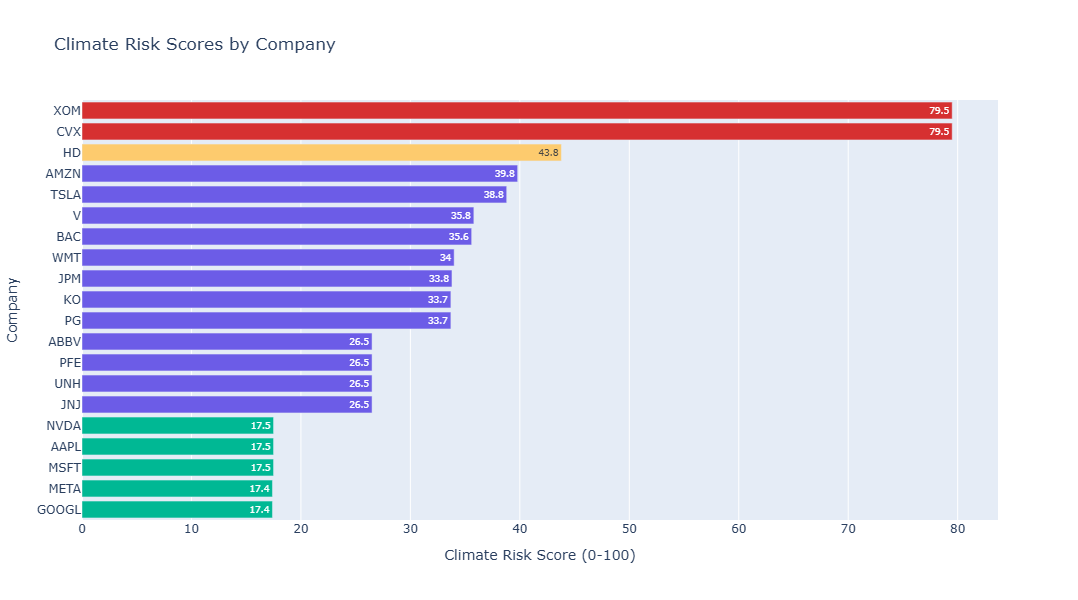

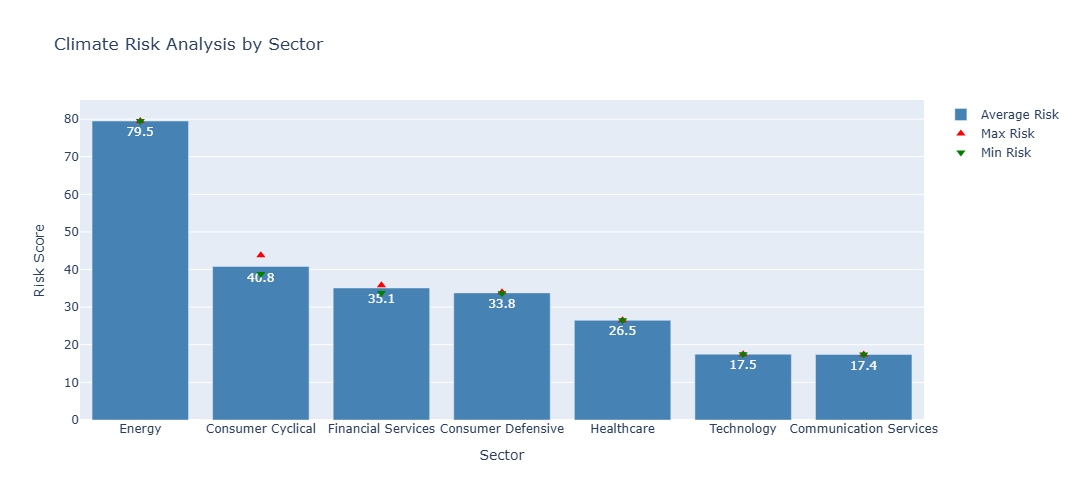

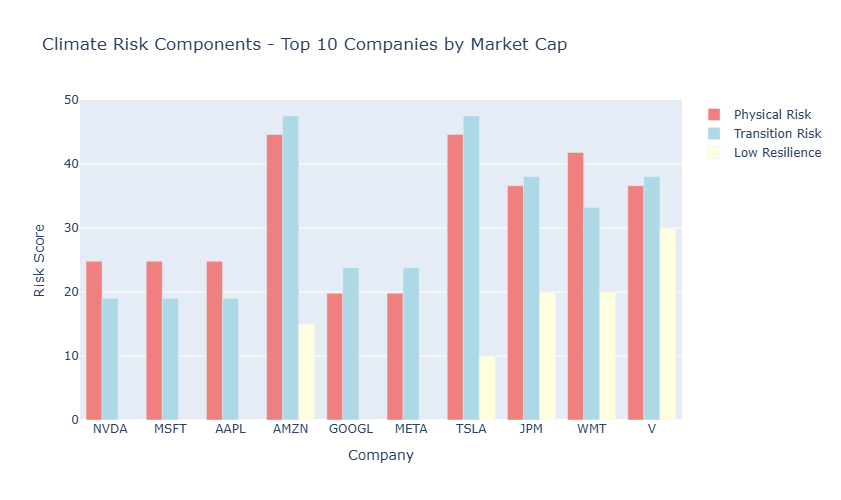

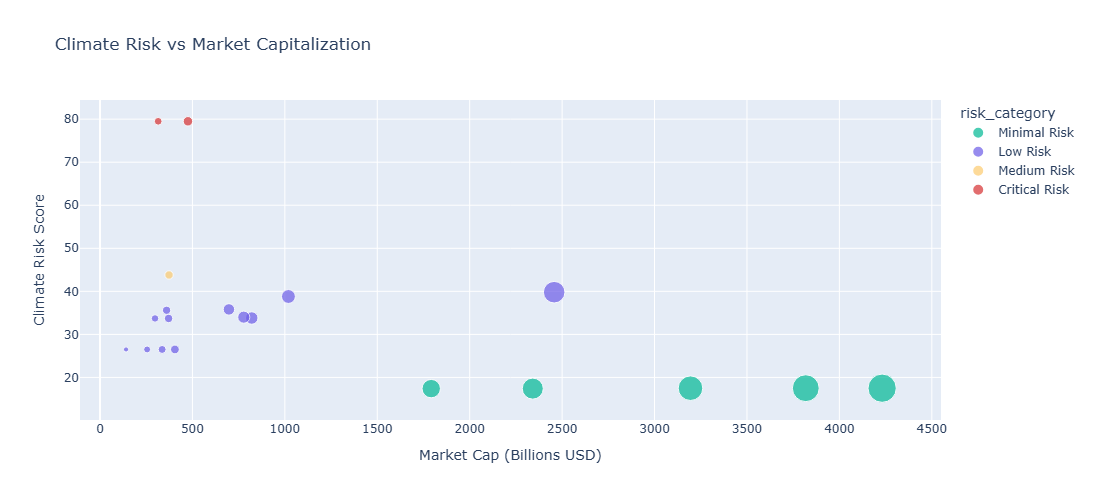


Step 4 Complete: All visualizations created and displayed


In [6]:
# Step 3: Climate Risk Visualizations
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

class ClimateRiskVisualizer:
    def __init__(self):
        self.colors = {
            'Critical Risk': '#d63031',    # Red
            'High Risk': '#e17055',        # Orange-red  
            'Medium Risk': '#fdcb6e',      # Yellow
            'Low Risk': '#6c5ce7',         # Purple
            'Minimal Risk': '#00b894'      # Green
        }
    
    def load_risk_data(self):
        """Load the climate risk analysis results"""
        try:
            df = pd.read_csv('data/climate_risk_analysis.csv')
            print(f"Loaded risk analysis for {len(df)} companies")
            return df
        except FileNotFoundError:
            print("Error: climate_risk_analysis.csv not found. Run Step 3 first.")
            return None
    
    def create_risk_distribution_chart(self, df):
        """Create bar chart showing risk scores by company"""
        # Sort by composite risk score
        df_sorted = df.sort_values('composite_risk', ascending=True)
        
        # Create color mapping
        colors = [self.colors[risk] for risk in df_sorted['risk_category']]
        
        fig = go.Figure(data=[
            go.Bar(
                y=df_sorted['symbol'],
                x=df_sorted['composite_risk'],
                text=df_sorted['composite_risk'].round(1),
                textposition='auto',
                marker_color=colors,
                orientation='h'
            )
        ])
        
        fig.update_layout(
            title='Climate Risk Scores by Company',
            xaxis_title='Climate Risk Score (0-100)',
            yaxis_title='Company',
            height=600,
            showlegend=False
        )
        
        return fig
    
    def create_sector_analysis_chart(self, df):
        """Create sector-level analysis chart"""
        sector_stats = df.groupby('sector').agg({
            'composite_risk': ['mean', 'min', 'max', 'count']
        }).round(1)
        
        sector_stats.columns = ['avg_risk', 'min_risk', 'max_risk', 'company_count']
        sector_stats = sector_stats.reset_index().sort_values('avg_risk', ascending=False)
        
        fig = go.Figure()
        
        # Add average risk bars
        fig.add_trace(go.Bar(
            x=sector_stats['sector'],
            y=sector_stats['avg_risk'],
            name='Average Risk',
            marker_color='steelblue',
            text=sector_stats['avg_risk'],
            textposition='auto'
        ))
        
        # Add error bars showing min/max range
        fig.add_trace(go.Scatter(
            x=sector_stats['sector'],
            y=sector_stats['max_risk'],
            mode='markers',
            marker=dict(symbol='triangle-up', size=8, color='red'),
            name='Max Risk'
        ))
        
        fig.add_trace(go.Scatter(
            x=sector_stats['sector'],
            y=sector_stats['min_risk'],
            mode='markers',
            marker=dict(symbol='triangle-down', size=8, color='green'),
            name='Min Risk'
        ))
        
        fig.update_layout(
            title='Climate Risk Analysis by Sector',
            xaxis_title='Sector',
            yaxis_title='Risk Score',
            height=500
        )
        
        return fig
    
    def create_risk_components_chart(self, df):
        """Create chart showing risk components breakdown"""
        # Select top 10 companies by market cap for clarity
        df_top = df.nlargest(10, 'market_cap_billions')
        
        fig = go.Figure()
        
        # Physical risk
        fig.add_trace(go.Bar(
            name='Physical Risk',
            x=df_top['symbol'],
            y=df_top['physical_risk'],
            marker_color='lightcoral'
        ))
        
        # Transition risk
        fig.add_trace(go.Bar(
            name='Transition Risk',
            x=df_top['symbol'],
            y=df_top['transition_risk'],
            marker_color='lightblue'
        ))
        
        # Financial resilience (inverted for stacking)
        fig.add_trace(go.Bar(
            name='Low Resilience',
            x=df_top['symbol'],
            y=100 - df_top['financial_resilience'],
            marker_color='lightyellow'
        ))
        
        fig.update_layout(
            title='Climate Risk Components - Top 10 Companies by Market Cap',
            xaxis_title='Company',
            yaxis_title='Risk Score',
            barmode='group',
            height=500
        )
        
        return fig
    
    def create_risk_vs_marketcap_scatter(self, df):
        """Create scatter plot of risk vs market cap"""
        fig = px.scatter(
            df,
            x='market_cap_billions',
            y='composite_risk',
            color='risk_category',
            size='market_cap_billions',
            hover_data=['symbol', 'name', 'sector'],
            title='Climate Risk vs Market Capitalization',
            labels={
                'market_cap_billions': 'Market Cap (Billions USD)',
                'composite_risk': 'Climate Risk Score'
            },
            color_discrete_map=self.colors
        )
        
        fig.update_layout(height=500)
        return fig
    
    def create_summary_table(self, df):
        """Create a summary statistics table"""
        summary_stats = {
            'Metric': [
                'Total Companies Analyzed',
                'Average Risk Score',
                'Highest Risk Company',
                'Lowest Risk Company',
                'Most Risky Sector',
                'Least Risky Sector',
                'Companies in Critical Risk',
                'Companies in Minimal Risk'
            ],
            'Value': [
                len(df),
                f"{df['composite_risk'].mean():.1f}",
                df.loc[df['composite_risk'].idxmax(), 'symbol'],
                df.loc[df['composite_risk'].idxmin(), 'symbol'],
                df.groupby('sector')['composite_risk'].mean().idxmax(),
                df.groupby('sector')['composite_risk'].mean().idxmin(),
                len(df[df['risk_category'] == 'Critical Risk']),
                len(df[df['risk_category'] == 'Minimal Risk'])
            ]
        }
        
        return pd.DataFrame(summary_stats)

# Initialize visualizer
visualizer = ClimateRiskVisualizer()

# Load risk analysis data
print("Step 4.1: Loading climate risk analysis data...")
risk_data = visualizer.load_risk_data()

if risk_data is not None:
    print("Step 4.2: Creating visualizations...")
    
    # Create summary table
    summary_table = visualizer.create_summary_table(risk_data)
    print("Summary Statistics:")
    print(summary_table.to_string(index=False))
    
    # Create visualizations
    print("\nStep 4.3: Generating charts...")
    
    # 1. Risk distribution chart
    risk_dist_chart = visualizer.create_risk_distribution_chart(risk_data)
    print("Created: Risk distribution chart")
    
    # 2. Sector analysis chart  
    sector_chart = visualizer.create_sector_analysis_chart(risk_data)
    print("Created: Sector analysis chart")
    
    # 3. Risk components chart
    components_chart = visualizer.create_risk_components_chart(risk_data)
    print("Created: Risk components chart")
    
    # 4. Risk vs market cap scatter
    scatter_chart = visualizer.create_risk_vs_marketcap_scatter(risk_data)
    print("Created: Risk vs market cap scatter plot")
    
    # Display charts (they will show in separate windows/tabs)
    print("\nStep 4.4: Displaying charts...")
    risk_dist_chart.show()
    sector_chart.show()
    components_chart.show()
    scatter_chart.show()
    
    print("\nStep 4 Complete: All visualizations created and displayed")
    
else:
    print("Cannot create visualizations without risk analysis data")

In [11]:
import os
import shutil

# Check current directory in Jupyter
print("Jupyter working directory:", os.getcwd())

# List all CSV files in current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
print("CSV files found:", csv_files)

# Check if our specific files exist
required_files = [
    'company_financial_data.csv',
    'climate_risk_analysis.csv', 
    'company_list.csv'
]

for file in required_files:
    if os.path.exists(file):
        print(f"✓ Found: {file}")
        # Show the full path
        print(f"  Full path: {os.path.abspath(file)}")
    else:
        print(f"✗ Missing: {file}")

Jupyter working directory: C:\Users\joshn\Documents\climate-intelligence-platform\climate_env
CSV files found: ['climate_risk_analysis.csv', 'company_financial_data.csv', 'company_list.csv']
✓ Found: company_financial_data.csv
  Full path: C:\Users\joshn\Documents\climate-intelligence-platform\climate_env\company_financial_data.csv
✓ Found: climate_risk_analysis.csv
  Full path: C:\Users\joshn\Documents\climate-intelligence-platform\climate_env\climate_risk_analysis.csv
✓ Found: company_list.csv
  Full path: C:\Users\joshn\Documents\climate-intelligence-platform\climate_env\company_list.csv
